In [3]:
import numpy as py
import pandas as pd

In [4]:
df = pd.read_csv('../data/raw/used_cars.csv')

## Data Exploration

In [5]:
print("Shape: ", df.shape)
print("=== Basic Info ===")
print(df.info())

Shape:  (38531, 30)
=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-nu

In [6]:
print("=== Missing Value ===")
# electirc_car = df[df['engine_type'] == 'electric']
print(df.isnull().sum())
# print(electirc_car)

=== Missing Value ===
manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64


In [7]:
print("=== Duplicates ===")
print(f"Duplicated rows: {df.duplicated().sum()}")

print("\n=== Data Types ===")
print(df.dtypes)

=== Duplicates ===
Duplicated rows: 40

=== Data Types ===
manufacturer_name     object
model_name            object
transmission          object
color                 object
odometer_value         int64
year_produced          int64
engine_fuel           object
engine_has_gas          bool
engine_type           object
engine_capacity      float64
body_type             object
has_warranty            bool
state                 object
drivetrain            object
price_usd            float64
is_exchangeable         bool
location_region       object
number_of_photos       int64
up_counter             int64
feature_0               bool
feature_1               bool
feature_2               bool
feature_3               bool
feature_4               bool
feature_5               bool
feature_6               bool
feature_7               bool
feature_8               bool
feature_9               bool
duration_listed        int64
dtype: object


## Categorial/Numerical Columns

In [8]:
categ_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.to_list()
bool_cols = df.select_dtypes(include=['bool']).columns.to_list()
print("Category Cols: ", categ_cols)
print("\nNumerical Cols: ", num_cols)
print("\nBoolean Cols: ", bool_cols)

Category Cols:  ['manufacturer_name', 'model_name', 'transmission', 'color', 'engine_fuel', 'engine_type', 'body_type', 'state', 'drivetrain', 'location_region']

Numerical Cols:  ['odometer_value', 'year_produced', 'engine_capacity', 'price_usd', 'number_of_photos', 'up_counter', 'duration_listed']

Boolean Cols:  ['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9']


### Numerical Column Stats

In [9]:
print(df[num_cols].describe())

       odometer_value  year_produced  engine_capacity     price_usd  \
count    38531.000000   38531.000000     38521.000000  38531.000000   
mean    248864.638447    2002.943734         2.055161   6639.971021   
std     136072.376530       8.065731         0.671178   6428.152018   
min          0.000000    1942.000000         0.200000      1.000000   
25%     158000.000000    1998.000000         1.600000   2100.000000   
50%     250000.000000    2003.000000         2.000000   4800.000000   
75%     325000.000000    2009.000000         2.300000   8990.000000   
max    1000000.000000    2019.000000         8.000000  50000.000000   

       number_of_photos    up_counter  duration_listed  
count      38531.000000  38531.000000     38531.000000  
mean           9.649062     16.306091        80.577249  
std            6.093217     43.286933       112.826569  
min            1.000000      1.000000         0.000000  
25%            5.000000      2.000000        23.000000  
50%            8.0

## Column Analysis

In [10]:
for col in categ_cols:
    print(f"\n{col}:")
    print(f"    Unique values: {df[col].unique()}")
    print(f"  Missing: {df[col].isnull().sum()} ({df[col].isnull().sum()/len(df)*100:.1f}%)")
    
    if df[col].nunique() <= 15:
        print(f"  Value counts:")
        print(df[col].value_counts())
    else:
        print(f"  Top 10 values:")
        print(df[col].value_counts().head(10))


manufacturer_name:
    Unique values: ['Subaru' 'LADA' 'Dodge' 'УАЗ' 'Kia' 'Opel' 'Москвич' 'Alfa Romeo' 'Acura'
 'Dacia' 'Lexus' 'Mitsubishi' 'Lancia' 'Citroen' 'Mini' 'Jaguar' 'Porsche'
 'SsangYong' 'Daewoo' 'Geely' 'ВАЗ' 'Fiat' 'Ford' 'Renault' 'Seat' 'Rover'
 'Volkswagen' 'Lifan' 'Jeep' 'Cadillac' 'Audi' 'ЗАЗ' 'Toyota' 'ГАЗ'
 'Volvo' 'Chevrolet' 'Great Wall' 'Buick' 'Pontiac' 'Lincoln' 'Hyundai'
 'Nissan' 'Suzuki' 'BMW' 'Mazda' 'Land Rover' 'Iveco' 'Skoda' 'Saab'
 'Infiniti' 'Chery' 'Honda' 'Mercedes-Benz' 'Peugeot' 'Chrysler']
  Missing: 0 (0.0%)
  Top 10 values:
manufacturer_name
Volkswagen       4243
Opel             2759
BMW              2610
Ford             2566
Renault          2493
Audi             2468
Mercedes-Benz    2237
Peugeot          1909
Citroen          1562
Nissan           1361
Name: count, dtype: int64

model_name:
    Unique values: ['Outback' 'Forester' 'Impreza' ... '180' 'Vision' 'Aspen']
  Missing: 0 (0.0%)
  Top 10 values:
model_name
Passat    1423
Astra

In [11]:
key_numerical = ['price_usd', 'odometer_value', 'year_produced', 'engine_capacity']
print("\n--- KEY NUMERICAL OUTLIER CHECK ---")
for col in key_numerical:
    if col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")

print("\n--- BOOLEAN COLUMNS ---")
for col in bool_cols:
    print(f"{col}:")
    print(df[col].value_counts())


--- KEY NUMERICAL OUTLIER CHECK ---
price_usd: 1744 outliers (4.5%)
odometer_value: 564 outliers (1.5%)
year_produced: 242 outliers (0.6%)
engine_capacity: 2006 outliers (5.2%)

--- BOOLEAN COLUMNS ---
engine_has_gas:
engine_has_gas
False    37184
True      1347
Name: count, dtype: int64
has_warranty:
has_warranty
False    38082
True       449
Name: count, dtype: int64
is_exchangeable:
is_exchangeable
False    24945
True     13586
Name: count, dtype: int64
feature_0:
feature_0
False    29725
True      8806
Name: count, dtype: int64
feature_1:
feature_1
True     23396
False    15135
Name: count, dtype: int64
feature_2:
feature_2
False    29907
True      8624
Name: count, dtype: int64
feature_3:
feature_3
False    27904
True     10627
Name: count, dtype: int64
feature_4:
feature_4
False    29227
True      9304
Name: count, dtype: int64
feature_5:
feature_5
False    24811
True     13720
Name: count, dtype: int64
feature_6:
feature_6
False    31943
True      6588
Name: count, dtype: int64

## Handling Missing Values

In [12]:
## Handling Missing Values
def handle_missing_values(df):
    df_clean = df.copy()

    print("== Handling Missing Values ==")
    
    # For electric cars 
    missing_engine = df_clean['engine_capacity'].isnull().sum()
    df_clean['engine_capacity'] = df_clean['engine_capacity'].fillna(0.0)
    df_clean['is_electric'] = df_clean['engine_capacity'] == 0.0
    print(f"Set {missing_engine} missing engine capacity to 0 (Electric cars)")
    
    return df_clean

## Filter Cars by Price
def filter_cars_by_price(df, min_price=100):
    print("\n== Filtering by Price ==")
    
    cheap_cars = df[df['price_usd'] < min_price]
    
    if len(cheap_cars) > 0:
        print(f"Removing {len(cheap_cars)} cars priced below ${min_price}")
        print(f"  Condition breakdown:")
        for condition, count in cheap_cars['state'].value_counts().items():
            print(f"  - {condition}: {count} cars")
        
        df_filtered = df[df['price_usd'] >= min_price]
    else:
        print(f"No cars below ${min_price}")
        df_filtered = df
    
    return df_filtered

## Filter Cars by Condition
def filter_cars_by_condition(df, target_condition='used'):
    print(f"\n== Filtering by Condition (Keeping '{target_condition}' only) ==")
    
    # Rename owned to used
    if 'owned' in df['state'].unique() and target_condition == 'used':
        df = df.copy()
        df['state'] = df['state'].replace('owned', 'used')
    
    condition_counts = df['state'].value_counts()
    print(f"Current condition distribution:")
    for condition, count in condition_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  {condition}: {count} cars ({percentage:.1f}%)")
    
    # Filter for target condition
    original_count = len(df)
    df_filtered = df[df['state'] == target_condition]
    
    print(f"Keeping {len(df_filtered)} '{target_condition}' cars")
    print(f"Removed {original_count - len(df_filtered)} other cars")
    
    return df_filtered

## Main Data Cleaning Pipeline
print("="*50)
print("DATA CLEANING PIPELINE")
print("="*50)

df_clean = handle_missing_values(df)
df_clean = filter_cars_by_price(df_clean, min_price=100)
df_clean = filter_cars_by_condition(df_clean, target_condition='used')

print("\n" + "="*50)
print("CLEANING COMPLETE")
print("="*50)
print(f"Original: {len(df)} cars")
print(f"Final: {len(df_clean)} cars")
print(f"Removed: {len(df) - len(df_clean)} cars")
print(f"Kept: {(len(df_clean)/len(df)*100):.1f}% of original")

print(f"\nFinal dataset - Price range: ${df_clean['price_usd'].min():.0f} to ${df_clean['price_usd'].max():.0f}")
print(f"Average price: ${df_clean['price_usd'].mean():.0f}")
print(f"All cars condition: {df_clean['state'].unique()}")

DATA CLEANING PIPELINE
== Handling Missing Values ==
Set 10 missing engine capacity to 0 (Electric cars)

== Filtering by Price ==
Removing 11 cars priced below $100
  Condition breakdown:
  - owned: 6 cars
  - emergency: 5 cars

== Filtering by Condition (Keeping 'used' only) ==
Current condition distribution:
  used: 37717 cars (97.9%)
  new: 438 cars (1.1%)
  emergency: 365 cars (0.9%)
Keeping 37717 'used' cars
Removed 803 other cars

CLEANING COMPLETE
Original: 38531 cars
Final: 37717 cars
Removed: 814 cars
Kept: 97.9% of original

Final dataset - Price range: $100 to $50000
Average price: $6475
All cars condition: ['used']


## Visualisation Distribution of data 

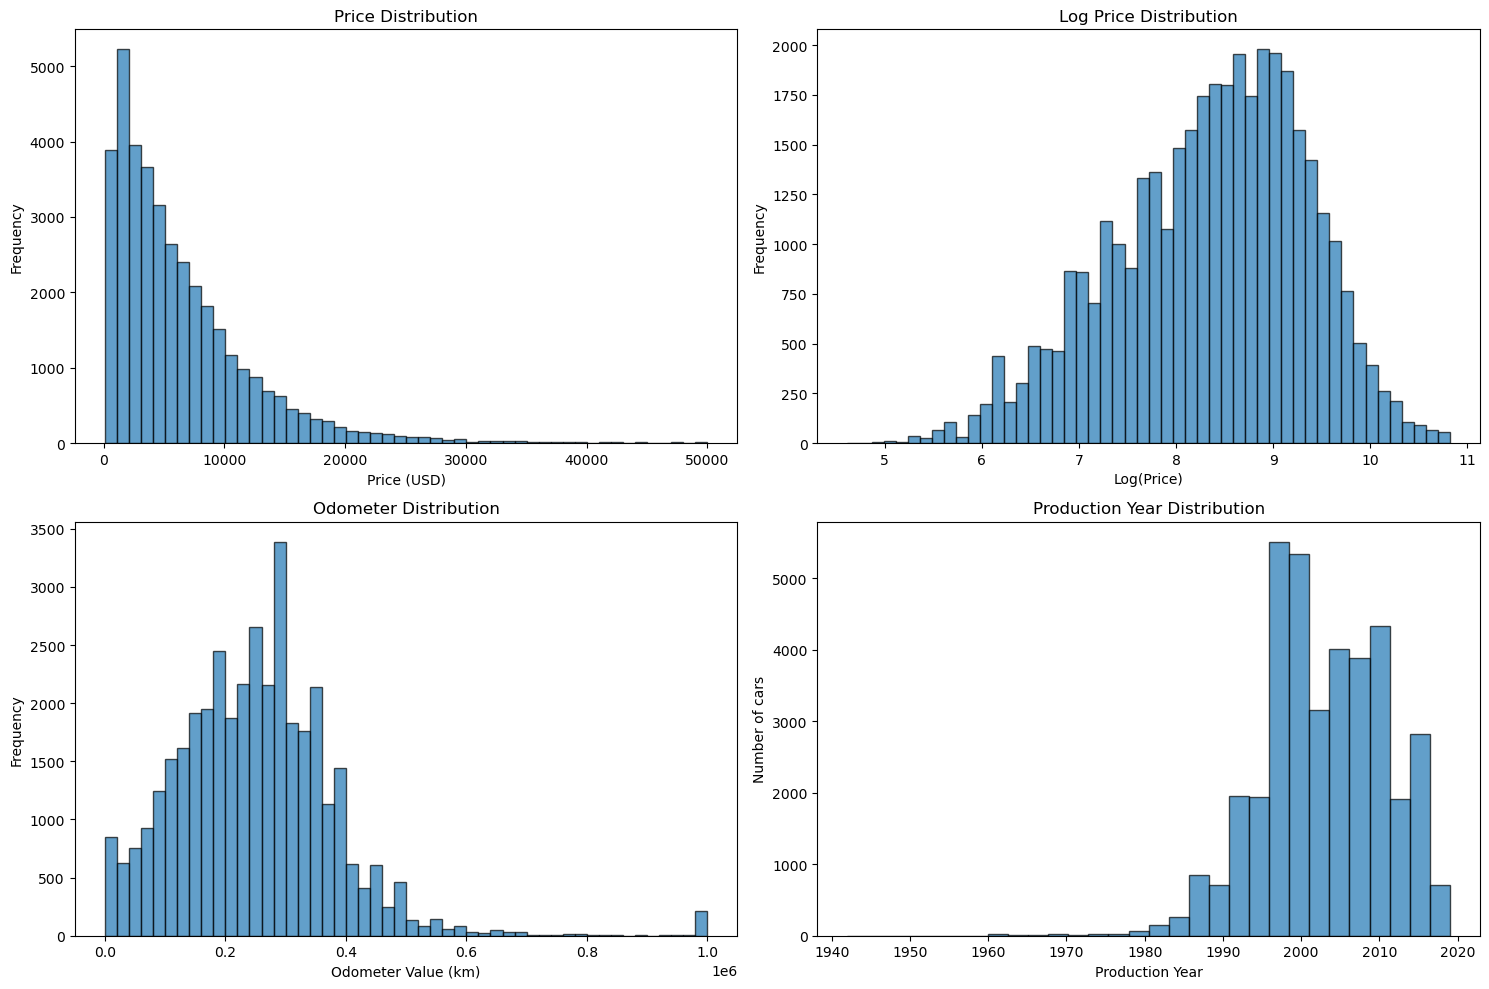

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#Price
axes[0,0].hist(df_clean['price_usd'], bins=50, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Price Distribution')
axes[0,0].set_xlabel('Price (USD)')
axes[0,0].set_ylabel('Frequency')

#Log pirce
axes[0,1].hist(py.log1p(df_clean['price_usd']), bins=50, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Log Price Distribution')
axes[0,1].set_xlabel('Log(Price)')
axes[0,1].set_ylabel('Frequency')

#Odomoter
axes[1,0].hist(df_clean['odometer_value'], bins=50, edgecolor='black', alpha=0.7)
axes[1,0].set_title('Odometer Distribution')
axes[1,0].set_xlabel('Odometer Value (km)')
axes[1,0].set_ylabel('Frequency')

#Year produced
axes[1,1].hist(df_clean['year_produced'], bins = 30, edgecolor='black', alpha=0.7)
axes[1,1].set_title("Production Year Distribution")
axes[1,1].set_xlabel('Production Year')
axes[1,1].set_ylabel('Number of cars')

plt.tight_layout()
plt.show()

In [14]:
## Filter Cars by Year
def filter_cars_by_year(df, min_year=1990):
    print(f"\n== Filtering by Year (>= {min_year}) ==")
    
    old_cars = df[df['year_produced'] < min_year]
    
    if len(old_cars) > 0:
        print(f"Removing {len(old_cars)} cars manufactured before {min_year}")
        print("  Year distribution of removed cars:")
        for year, count in old_cars['year_produced'].value_counts().sort_index().items():
            print(f"  - {year}: {count} cars")
        
        df_filtered = df[df['year_produced'] >= min_year]
    else:
        print(f"No cars older than {min_year}")
        df_filtered = df
    
    return df_filtered

df_clean = filter_cars_by_year(df_clean, min_year=1990)



== Filtering by Year (>= 1990) ==
Removing 1780 cars manufactured before 1990
  Year distribution of removed cars:
  - 1942: 1 cars
  - 1950: 1 cars
  - 1956: 1 cars
  - 1959: 1 cars
  - 1960: 18 cars
  - 1961: 2 cars
  - 1962: 6 cars
  - 1963: 6 cars
  - 1964: 4 cars
  - 1965: 5 cars
  - 1966: 4 cars
  - 1967: 4 cars
  - 1968: 10 cars
  - 1969: 7 cars
  - 1970: 4 cars
  - 1971: 2 cars
  - 1972: 7 cars
  - 1973: 4 cars
  - 1974: 7 cars
  - 1975: 15 cars
  - 1976: 15 cars
  - 1977: 11 cars
  - 1978: 27 cars
  - 1979: 12 cars
  - 1980: 28 cars
  - 1981: 31 cars
  - 1982: 50 cars
  - 1983: 63 cars
  - 1984: 109 cars
  - 1985: 150 cars
  - 1986: 269 cars
  - 1987: 289 cars
  - 1988: 284 cars
  - 1989: 333 cars


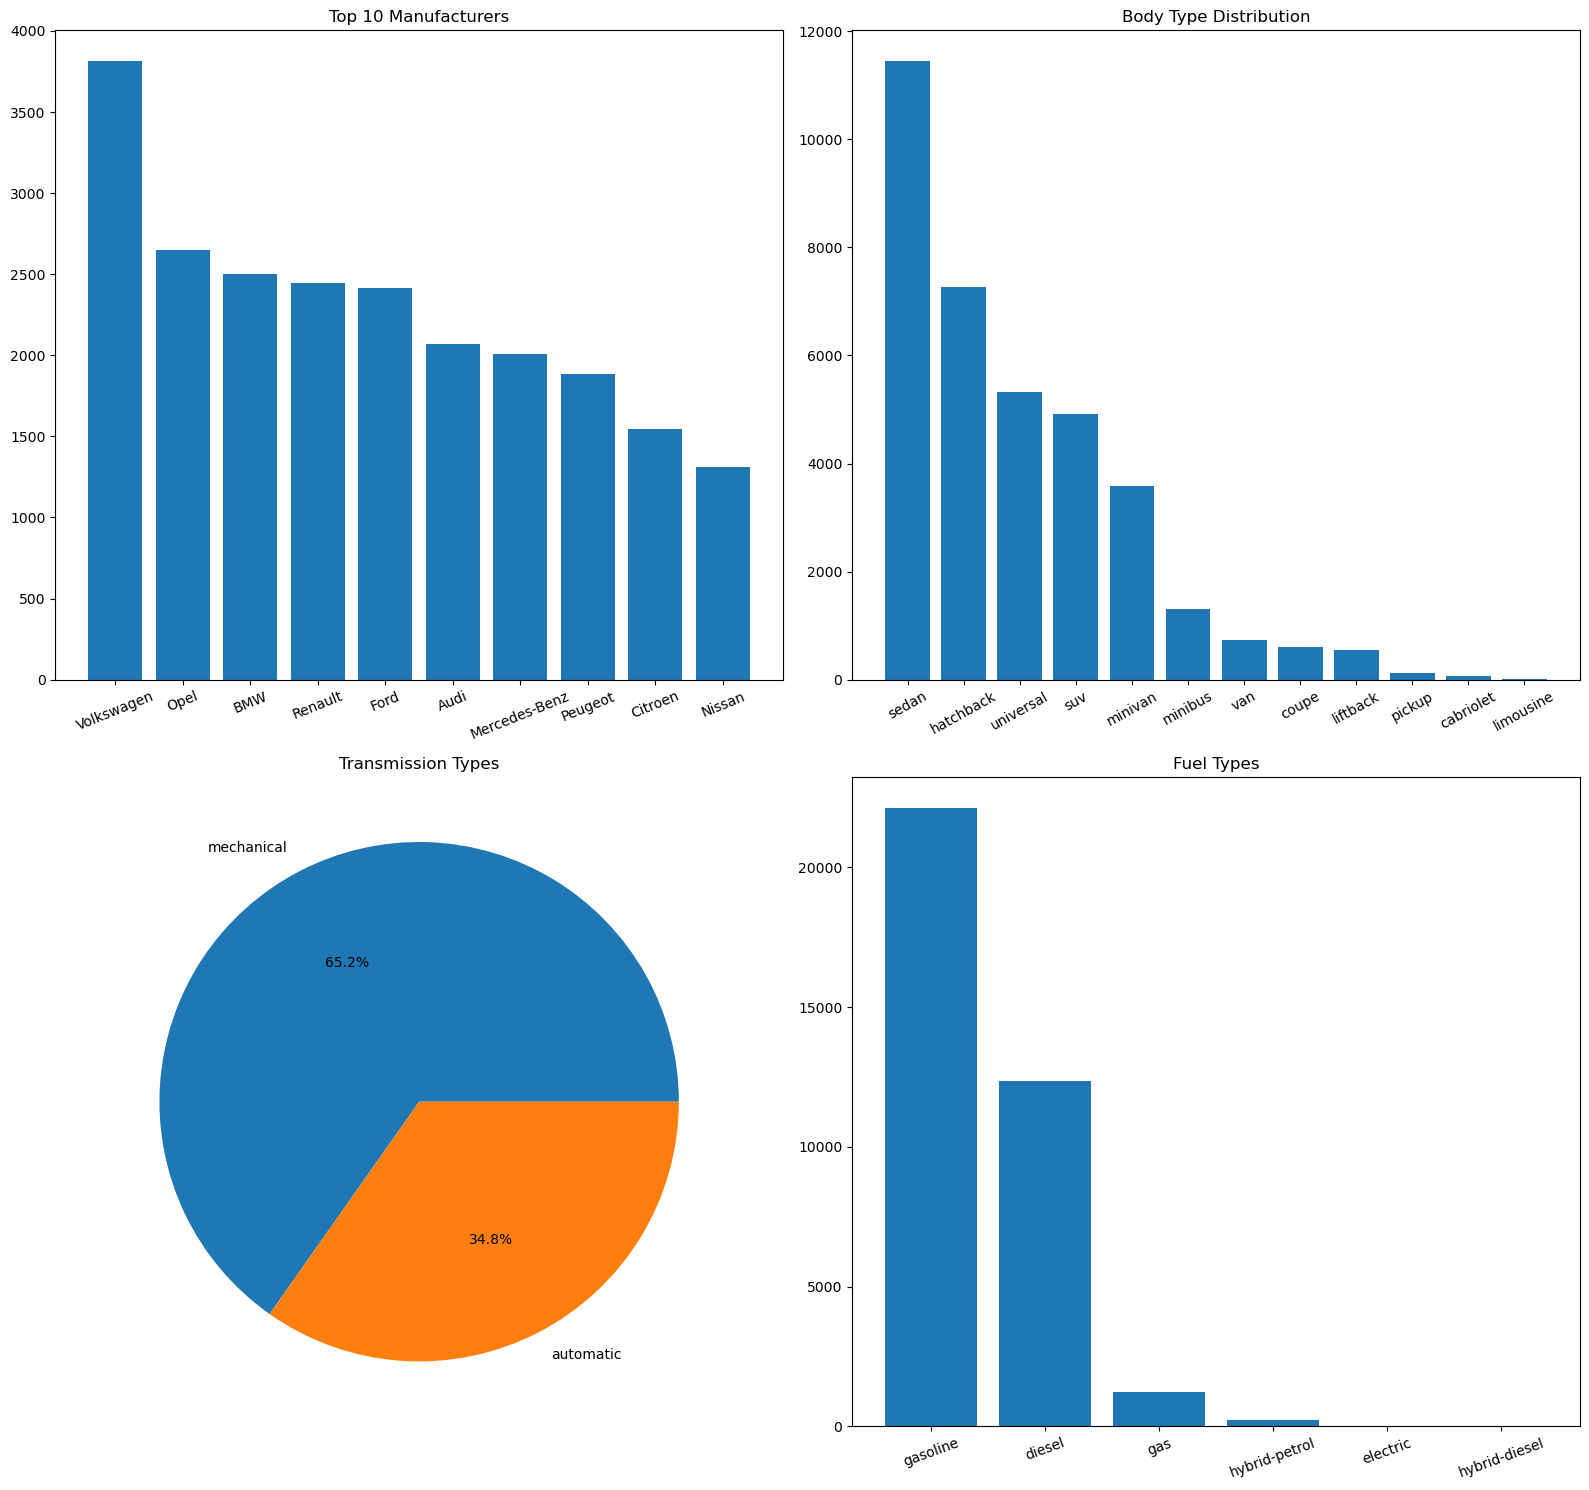

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(16,15))

top_manufacturers = df_clean['manufacturer_name'].value_counts().head(10)
axes[0,0].bar(top_manufacturers.index, top_manufacturers.values)
axes[0,0].set_title('Top 10 Manufacturers')
axes[0,0].tick_params(axis='x', rotation=22)

body_types = df_clean['body_type'].value_counts()
axes[0,1].bar(body_types.index, body_types.values)
axes[0,1].set_title('Body Type Distribution')
axes[0,1].tick_params(axis='x', rotation=29)

transmission = df_clean['transmission'].value_counts()
axes[1,0].pie(transmission.values, labels=transmission.index, autopct='%1.1f%%')
axes[1,0].set_title('Transmission Types')

fuel_types = df_clean['engine_fuel'].value_counts()
axes[1,1].bar(fuel_types.index, fuel_types.values)
axes[1,1].set_title('Fuel Types')
axes[1,1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


## Brand with expensive used cars

Brands with expensive cars
Total expensive cars: 99
Brands with expensive used cars: 
 Mercedes-Benz: 31 cars
 BMW: 29 cars
 Lexus: 8 cars
 Audi: 7 cars
 Land Rover: 7 cars
 Jaguar: 5 cars
 Toyota: 3 cars
 Volvo: 3 cars
 Porsche: 1 cars
 Ford: 1 cars
 Volkswagen: 1 cars
 Chevrolet: 1 cars
 Honda: 1 cars
 Chrysler: 1 cars


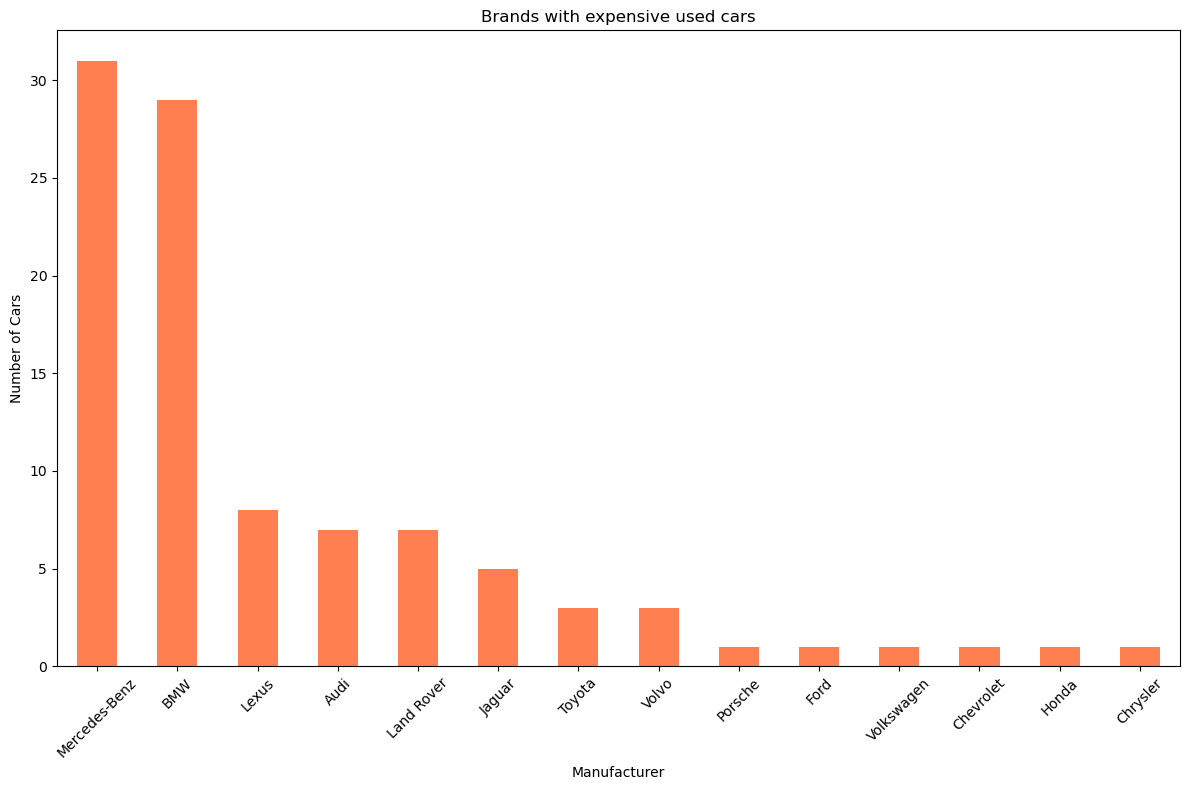

In [16]:
expensive_cars = df_clean[df_clean['price_usd'] > 40000]
expensive_brands = expensive_cars['manufacturer_name'].value_counts()

print("Brands with expensive cars")
print(f"Total expensive cars: {len(expensive_cars)}")
print(f"Brands with expensive used cars: ")
for brand, count in expensive_brands.items():
    print(f" {brand}: {count} cars")

#Plot
plt.figure(figsize=(12,8))
expensive_brands.plot(kind='bar', color='coral')
plt.title('Brands with expensive used cars')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Relationship visualisation

Text(0, 0.5, 'Average Price (USD)')

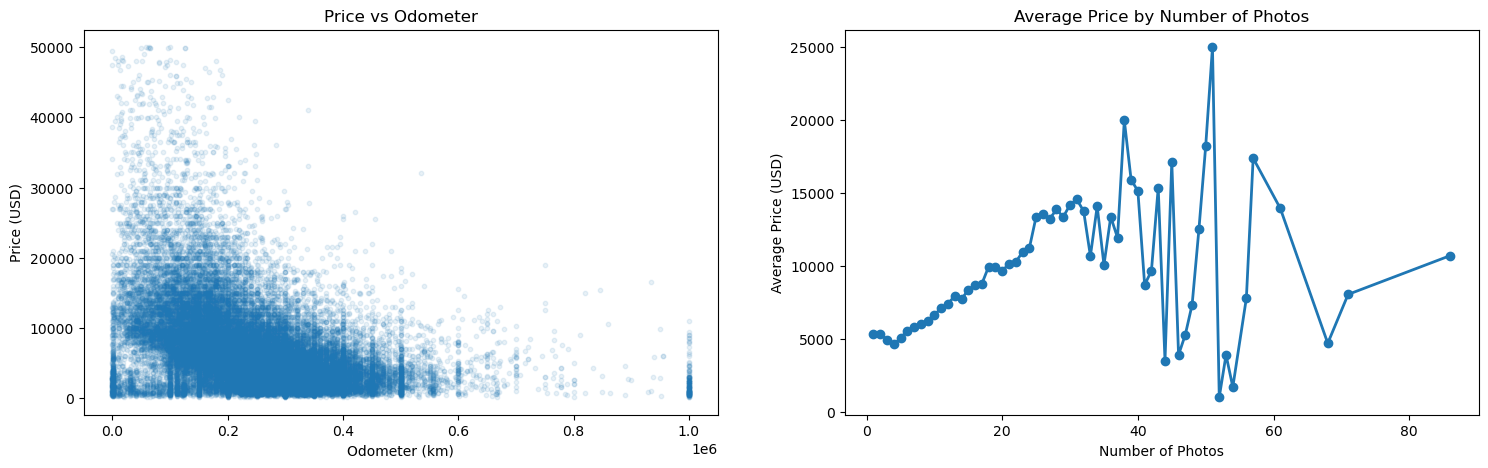

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18,5))

#Price vs Odometer
axes[0].scatter(df_clean['odometer_value'], df_clean['price_usd'], alpha=0.1, s=10)
axes[0].set_title("Price vs Odometer")
axes[0].set_xlabel("Odometer (km)")
axes[0].set_ylabel("Price (USD)")

# axes[1,1].axis('off')
# price_by_year = df_clean.groupby('year_produced')['price_usd'].agg(['mean', 'median', 'count']).reset_index()
# axes[1].plot(price_by_year['year_produced'], price_by_year['mean'], marker='o', linewidth=2, label='Average Price')
# axes[1].plot(price_by_year['year_produced'], price_by_year['median'], marker='x', linewidth=2, label='Median Price')
# axes[1].set_title('Price Trends by Production Year')
# axes[1].set_xlabel('Production year')
# axes[1].set_ylabel('Price (USD)')
# axes[1].legend()
# axes[1].grid(True, alpha=0.3)

# axes[1].scatter(df_clean['year_produced'], df_clean['price_usd'], alpha=0.3)
# axes[1].set_title("Price vs Odometer")
# axes[1].set_xlabel("Production Year")
# axes[1].set_ylabel("Price (USD)")
# sns.boxplot(data=df_clean, x='engine_capacity_bin', y='price_usd', ax=axes[1])
# axes[1].set_title("Price vs Engine Capacity")
# axes[1].set_xlabel("Engine Capacity (L)")
# axes[1].set_ylabel("Price (USD)")


photos_avg_price = df_clean.groupby('number_of_photos')['price_usd'].mean()
axes[1].plot(photos_avg_price.index, photos_avg_price.values, marker='o', linewidth=2)
axes[1].set_title('Average Price by Number of Photos')
axes[1].set_xlabel('Number of Photos')
axes[1].set_ylabel('Average Price (USD)')

## Avg Price by Engine Capacity

=== Average Price by Engine Capacity ===
engine_capacity_bin
<1.5l        5335.542471
1.5-2.0l     5835.223773
2.0-2.5l     6746.842666
2.5-3.0l    11496.076742
3.0-4.0l    11280.436705
>4.0l       13522.375165
Name: price_usd, dtype: float64


C:\Users\hafiz\AppData\Local\Temp\ipykernel_22436\1729472664.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engine_avg_price = df_clean.groupby('engine_capacity_bin')['price_usd'].mean()


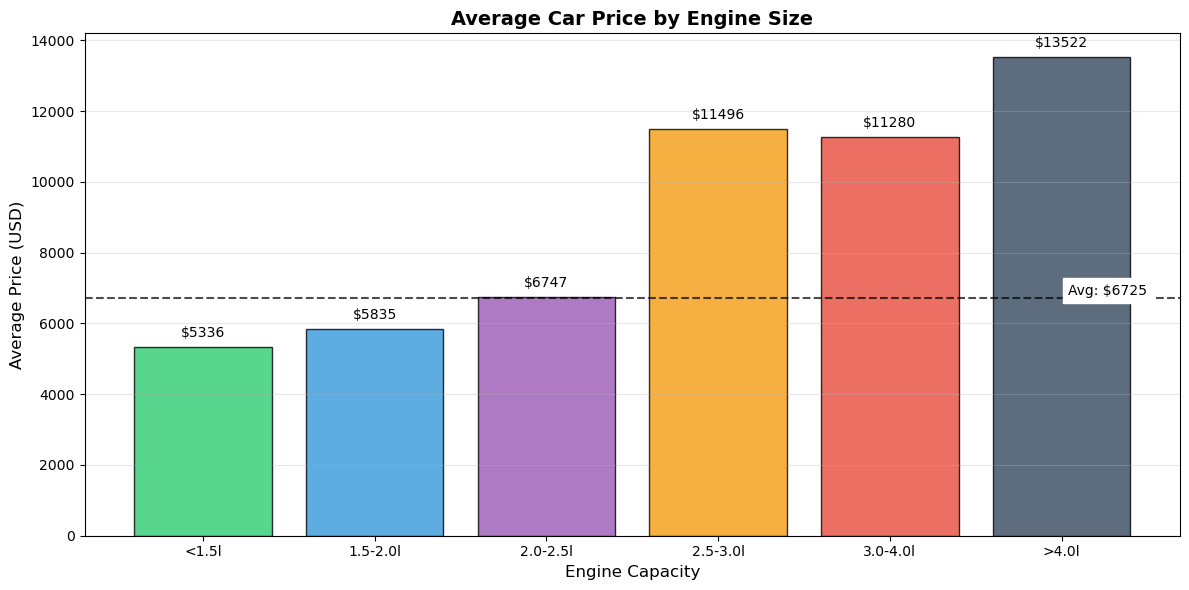


Key Insights:
1. Overall average price: $6725
2. Most expensive engine size: >4.0l ($13522)
3. Cheapest engine size: <1.5l ($5336)


In [18]:
# Price vs Engine Capacity (Simplified)
# Create engine capacity bins
df_clean['engine_capacity_bin'] = pd.cut(df_clean['engine_capacity'],
                                         bins=[0, 1.5, 2.0, 2.5, 3.0, 4.0, 10],
                                         labels=['<1.5l', '1.5-2.0l', '2.0-2.5l', '2.5-3.0l', '3.0-4.0l', '>4.0l'])

# Calculate average price by engine capacity
engine_avg_price = df_clean.groupby('engine_capacity_bin')['price_usd'].mean()

print("=== Average Price by Engine Capacity ===")
print(engine_avg_price)

# Simple bar chart
plt.figure(figsize=(12, 6))
colors = ['#2ecc71', '#3498db', '#9b59b6', '#f39c12', '#e74c3c', '#34495e']

bars = plt.bar(engine_avg_price.index, engine_avg_price.values, 
               color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# Add price labels
for bar in bars:
    height = bar.get_height()
    if height > 0:
        plt.text(bar.get_x() + bar.get_width()/2, height + 200,
                f'${height:.0f}', ha='center', va='bottom', fontsize=10)

plt.title("Average Car Price by Engine Size", fontsize=14, fontweight='bold')
plt.xlabel("Engine Capacity", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

# Add overall average line
overall_avg = df_clean['price_usd'].mean()
plt.axhline(y=overall_avg, color='black', linestyle='--', alpha=0.7, linewidth=1.5)
plt.text(len(engine_avg_price)-0.5, overall_avg, f'Avg: ${overall_avg:.0f}', 
         ha='right', va='bottom', fontsize=10, backgroundcolor='white')

plt.tight_layout()
plt.show()

# Quick insights
print(f"\nKey Insights:")
print(f"1. Overall average price: ${overall_avg:.0f}")
print(f"2. Most expensive engine size: {engine_avg_price.idxmax()} (${engine_avg_price.max():.0f})")
print(f"3. Cheapest engine size: {engine_avg_price.idxmin()} (${engine_avg_price.min():.0f})")

## Number of cars by engine capacity

=== Number of Cars by Engine Capacity ===
engine_capacity_bin
<1.5l        5370
1.5-2.0l    19293
2.0-2.5l     6444
2.5-3.0l     2388
3.0-4.0l     1584
>4.0l         848
Name: count, dtype: int64


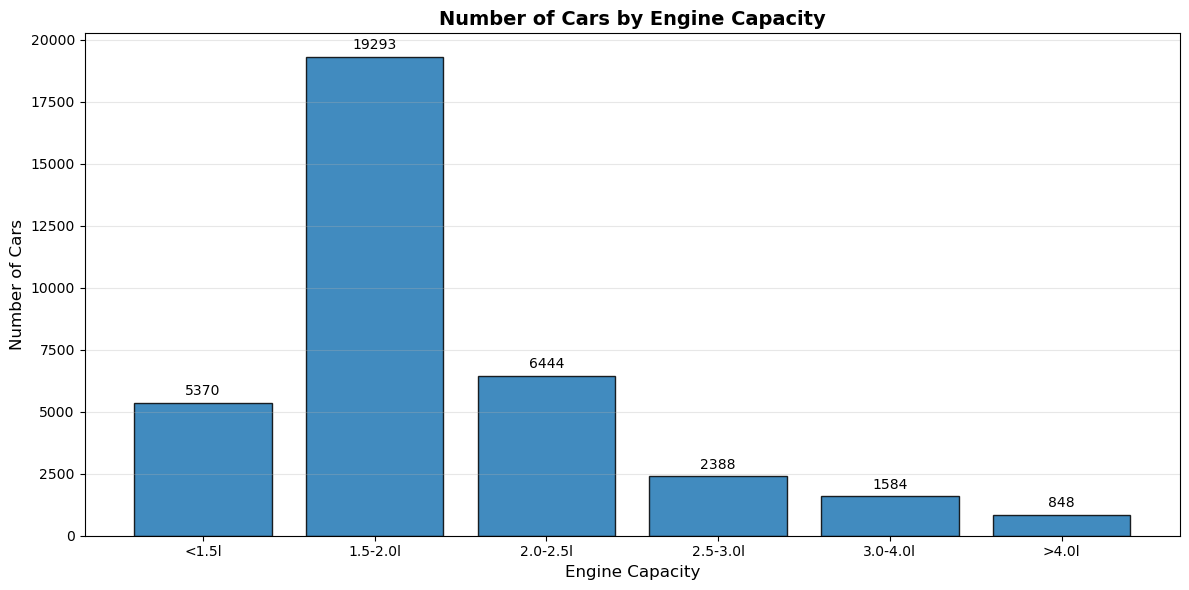


Key Insights:
1. Most common engine size: 1.5-2.0l (19293 cars)
2. Least common engine size: >4.0l (848 cars)
3. Total cars analysed: 35927


In [19]:
df_clean['engine_capacity_bin'] = pd.cut(
    df_clean['engine_capacity'],
    bins=[0, 1.5, 2.0, 2.5, 3.0, 4.0, 10],
    labels=['<1.5l', '1.5-2.0l', '2.0-2.5l', '2.5-3.0l', '3.0-4.0l', '>4.0l']
)

engine_count = df_clean['engine_capacity_bin'].value_counts().sort_index()
print("=== Number of Cars by Engine Capacity ===")
print(engine_count)

plt.figure(figsize=(12, 6))
bars = plt.bar(
    engine_count.index,
    engine_count.values,
    alpha=0.85,
    edgecolor='black',
    linewidth=1
)
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + (engine_count.max() * 0.01),
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Number of Cars by Engine Capacity", fontsize=14, fontweight='bold')
plt.xlabel("Engine Capacity", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nKey Insights:")
print(f"1. Most common engine size: {engine_count.idxmax()} ({engine_count.max()} cars)")
print(f"2. Least common engine size: {engine_count.idxmin()} ({engine_count.min()} cars)")
print(f"3. Total cars analysed: {engine_count.sum()}")


## Finding the Volkswagen and Opel cars in the 1.5-2.0l

=== VOLKSWAGEN & OPEL CARS (1.5L-2.0L) ===

Total cars in 1.5L-2.0L range: 20657
Volkswagen & Opel cars in this range: 4451
Market share: 21.5%

Breakdown by Manufacturer:

Volkswagen:
  • Count: 2714 cars
  • Avg price: $6671
  • Avg year: 2003
  • Price range: $300-$38500
  • Top models:
    - Passat: 1155 cars (avg $5436)
    - Golf: 412 cars (avg $3838)
    - Sharan: 165 cars (avg $7187)

Opel:
  • Count: 1737 cars
  • Avg price: $4576
  • Avg year: 2002
  • Price range: $200-$22900
  • Top models:
    - Astra: 547 cars (avg $4051)
    - Vectra: 451 cars (avg $2668)
    - Zafira: 298 cars (avg $6563)


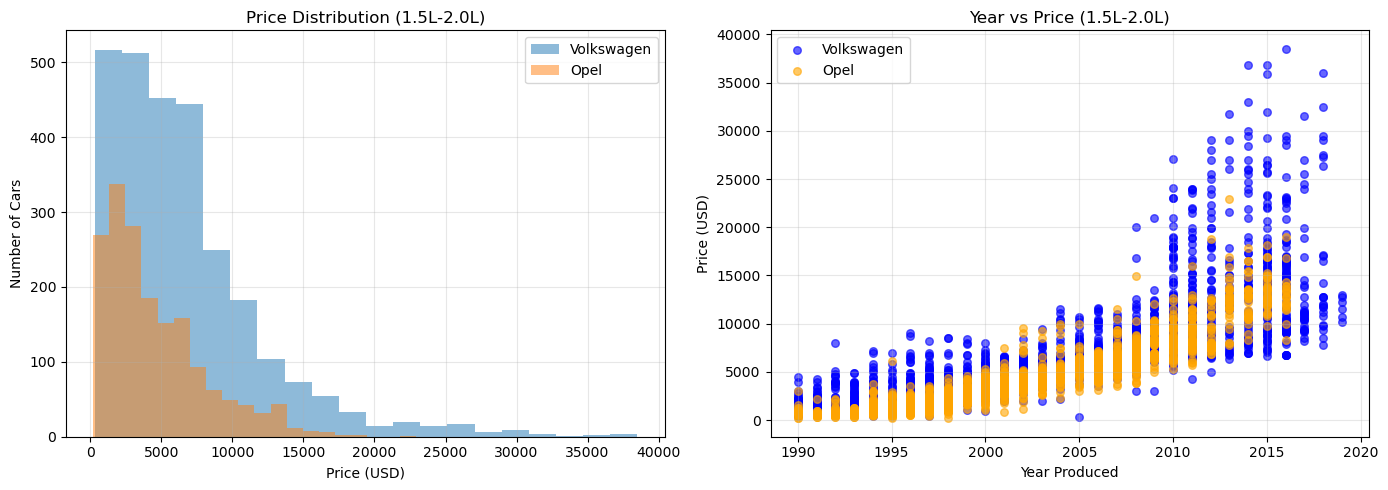


CLUSTERING RECOMMENDATIONS

Based on the analysis, I recommend clustering by:

1. PRICE SEGMENTS:
   • Budget (< $5,000)
   • Mid-range ($5,000 - $10,000)
   • Premium ($10,000+)

2. ENGINE SIZE CATEGORIES:
   • Small (0-1.5L)
   • Medium (1.5-2.0L) ← Volkswagen/Opel focus
   • Large (2.0-3.0L)
   • Extra Large (>3.0L)

3. CAR AGE GROUPS:
   • Vintage (pre-1990)
   • Older (1990-2000)
   • Modern (2000-2010)
   • Recent (2010+)

4. MANUFACTURER TIERS:
   • Economy (Opel, Renault, Ford, etc.)
   • Mid-tier (Volkswagen, Toyota, Honda, etc.)
   • Luxury (BMW, Mercedes, Audi, etc.)

5. BODY TYPE:
   • Sedans
   • Hatchbacks
   • SUVs
   • Minivans/Vans

EXAMPLE: CLUSTER VW/OPEL 1.5L-2.0L CARS

Cluster distribution for Volkswagen & Opel (1.5L-2.0L):

By Price Segment:
  Budget: 2385 cars (53.6%), avg $2606
  Mid-range: 1403 cars (31.5%), avg $7154
  Premium: 663 cars (14.9%), avg $14784

By Age Group:
  Older: 1890 cars (42.5%), avg year 1996
  Modern: 1703 cars (38.3%), avg year 2006
  Re

C:\Users\hafiz\AppData\Local\Temp\ipykernel_22436\684337048.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vw_opel_cars['price_segment'] = pd.cut(vw_opel_cars['price_usd'],
C:\Users\hafiz\AppData\Local\Temp\ipykernel_22436\684337048.py:108: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vw_opel_cars['age_group'] = pd.cut(vw_opel_cars['year_produced'],
C:\Users\hafiz\AppData\Local\Temp\ipykernel_22436\684337048.py:131: FutureWarning: The default of observed=False is deprecated and will be changed to Tr

In [20]:
# Analyze Volkswagen and Opel cars in 1.5L-2.0L range
print("=== VOLKSWAGEN & OPEL CARS (1.5L-2.0L) ===")

# Filter for Volkswagen and Opel cars with 1.5L-2.0L engines
target_engines = df_clean[(df_clean['engine_capacity'] >= 1.5) & (df_clean['engine_capacity'] <= 2.0)]
vw_opel_cars = target_engines[target_engines['manufacturer_name'].isin(['Volkswagen', 'Opel'])]

print(f"\nTotal cars in 1.5L-2.0L range: {len(target_engines)}")
print(f"Volkswagen & Opel cars in this range: {len(vw_opel_cars)}")
print(f"Market share: {(len(vw_opel_cars)/len(target_engines)*100):.1f}%\n")

# Breakdown by manufacturer
print("Breakdown by Manufacturer:")
for brand in ['Volkswagen', 'Opel']:
    brand_cars = vw_opel_cars[vw_opel_cars['manufacturer_name'] == brand]
    if len(brand_cars) > 0:
        avg_price = brand_cars['price_usd'].mean()
        avg_year = brand_cars['year_produced'].mean()
        print(f"\n{brand}:")
        print(f"  • Count: {len(brand_cars)} cars")
        print(f"  • Avg price: ${avg_price:.0f}")
        print(f"  • Avg year: {avg_year:.0f}")
        print(f"  • Price range: ${brand_cars['price_usd'].min():.0f}-${brand_cars['price_usd'].max():.0f}")
        
        # Top 3 models
        top_models = brand_cars['model_name'].value_counts().head(3)
        print(f"  • Top models:")
        for model, count in top_models.items():
            model_price = brand_cars[brand_cars['model_name'] == model]['price_usd'].mean()
            print(f"    - {model}: {count} cars (avg ${model_price:.0f})")

# Visualize the comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Price distribution
for brand in ['Volkswagen', 'Opel']:
    brand_prices = vw_opel_cars[vw_opel_cars['manufacturer_name'] == brand]['price_usd']
    if len(brand_prices) > 0:
        ax1.hist(brand_prices, bins=20, alpha=0.5, label=brand)

ax1.set_title("Price Distribution (1.5L-2.0L)")
ax1.set_xlabel("Price (USD)")
ax1.set_ylabel("Number of Cars")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Year vs Price scatter
for brand, color in [('Volkswagen', 'blue'), ('Opel', 'orange')]:
    brand_data = vw_opel_cars[vw_opel_cars['manufacturer_name'] == brand]
    if len(brand_data) > 0:
        ax2.scatter(brand_data['year_produced'], brand_data['price_usd'], 
                   alpha=0.6, label=brand, color=color, s=30)

ax2.set_title("Year vs Price (1.5L-2.0L)")
ax2.set_xlabel("Year Produced")
ax2.set_ylabel("Price (USD)")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clustering recommendations
print("\n" + "="*60)
print("CLUSTERING RECOMMENDATIONS")
print("="*60)

print("\nBased on the analysis, I recommend clustering by:")

print("\n1. PRICE SEGMENTS:")
print("   • Budget (< $5,000)")
print("   • Mid-range ($5,000 - $10,000)")
print("   • Premium ($10,000+)")

print("\n2. ENGINE SIZE CATEGORIES:")
print("   • Small (0-1.5L)")
print("   • Medium (1.5-2.0L) ← Volkswagen/Opel focus")
print("   • Large (2.0-3.0L)")
print("   • Extra Large (>3.0L)")

print("\n3. CAR AGE GROUPS:")
print("   • Vintage (pre-1990)")
print("   • Older (1990-2000)")
print("   • Modern (2000-2010)")
print("   • Recent (2010+)")

print("\n4. MANUFACTURER TIERS:")
print("   • Economy (Opel, Renault, Ford, etc.)")
print("   • Mid-tier (Volkswagen, Toyota, Honda, etc.)")
print("   • Luxury (BMW, Mercedes, Audi, etc.)")

print("\n5. BODY TYPE:")
print("   • Sedans")
print("   • Hatchbacks")
print("   • SUVs")
print("   • Minivans/Vans")

# Create a simple clustering example
print("\n" + "="*60)
print("EXAMPLE: CLUSTER VW/OPEL 1.5L-2.0L CARS")
print("="*60)

# Create clusters based on price and year
vw_opel_cars['price_segment'] = pd.cut(vw_opel_cars['price_usd'],
                                       bins=[0, 5000, 10000, 50000],
                                       labels=['Budget', 'Mid-range', 'Premium'])

vw_opel_cars['age_group'] = pd.cut(vw_opel_cars['year_produced'],
                                   bins=[1900, 1990, 2000, 2010, 2025],
                                   labels=['Vintage', 'Older', 'Modern', 'Recent'])

# Show cluster distribution
print("\nCluster distribution for Volkswagen & Opel (1.5L-2.0L):")

print("\nBy Price Segment:")
price_segments = vw_opel_cars['price_segment'].value_counts()
for segment, count in price_segments.items():
    percentage = (count / len(vw_opel_cars)) * 100
    avg_price = vw_opel_cars[vw_opel_cars['price_segment'] == segment]['price_usd'].mean()
    print(f"  {segment}: {count} cars ({percentage:.1f}%), avg ${avg_price:.0f}")

print("\nBy Age Group:")
age_groups = vw_opel_cars['age_group'].value_counts()
for group, count in age_groups.items():
    percentage = (count / len(vw_opel_cars)) * 100
    avg_year = vw_opel_cars[vw_opel_cars['age_group'] == group]['year_produced'].mean()
    print(f"  {group}: {count} cars ({percentage:.1f}%), avg year {avg_year:.0f}")

# Show example clusters
print("\nExample Clusters (Most Common):")
cluster_combinations = vw_opel_cars.groupby(['price_segment', 'age_group']).size()
for (price_seg, age_group), count in cluster_combinations.nlargest(5).items():
    cluster_data = vw_opel_cars[(vw_opel_cars['price_segment'] == price_seg) & 
                                (vw_opel_cars['age_group'] == age_group)]
    avg_price = cluster_data['price_usd'].mean()
    print(f"  {price_seg} + {age_group}: {count} cars (avg ${avg_price:.0f})")

# Final summary
print("\n" + "="*60)
print("SUMMARY")
print("="*60)

total_vw_opel_1_5_to_2 = len(vw_opel_cars)
total_all_cars = len(df_clean)
percentage = (total_vw_opel_1_5_to_2 / total_all_cars) * 100

print(f"\n• Volkswagen & Opel (1.5L-2.0L): {total_vw_opel_1_5_to_2} cars")
print(f"• This represents {percentage:.1f}% of all cars in dataset")
print(f"• Most common cluster: {cluster_combinations.idxmax()[0]} {cluster_combinations.idxmax()[1]} cars")
print(f"• Recommendation: Focus on {vw_opel_cars['price_segment'].mode()[0]} segment")

# Add in graph for x-axis age y-axis price, binning of engine capacity

## Brand comparison for Age, Price, Engine capacity

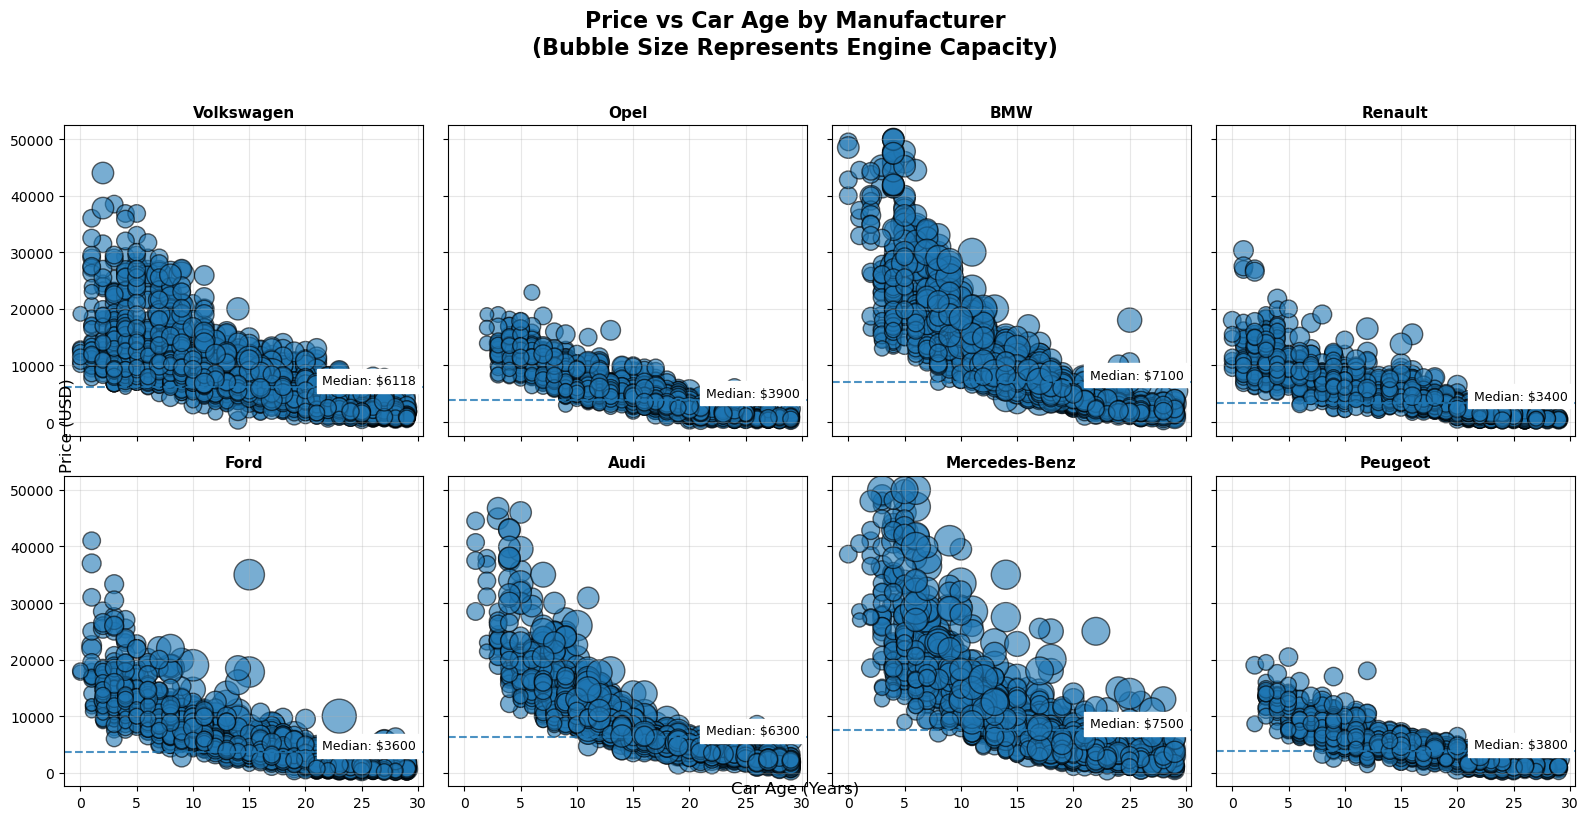

In [34]:
# Brand comparison: Age vs Price vs Engine Capacity
current_year = df_clean['year_produced'].max()
df_clean['car_age'] = current_year - df_clean['year_produced']

# Set 8 brands only for now
TOP_N_BRANDS = 8
top_brands = df_clean['manufacturer_name'].value_counts().head(TOP_N_BRANDS).index

brand_data = df_clean[df_clean['manufacturer_name'].isin(top_brands)]

n_cols = 4
n_rows = (len(top_brands) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows), sharex=True, sharey=True)
axes = axes.flatten()

for i, brand in enumerate(top_brands):
    ax = axes[i]
    subset = brand_data[brand_data['manufacturer_name'] == brand]
    
    ax.scatter(
        subset['car_age'],
        subset['price_usd'],
        s=subset['engine_capacity'] * 80,
        alpha=0.6,
        edgecolors='black'
    )
    
    # Median price line
    median_price = subset['price_usd'].median()
    ax.axhline(
        median_price,
        linestyle='--',
        linewidth=1.5,
        alpha=0.8
    )
    
    # Median price annotation
    ax.text(
        0.98,
        median_price,
        f"Median: ${median_price:.0f}",
        transform=ax.get_yaxis_transform(),
        ha='right',
        va='bottom',
        fontsize=9,
        backgroundcolor='white'
    )
    
    ax.set_title(brand, fontsize=11, fontweight='bold')
    ax.grid(True, alpha=0.3)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(
    "Price vs Car Age by Manufacturer\n(Bubble Size Represents Engine Capacity)",
    fontsize=16,
    fontweight='bold',
    y=1.02
)

fig.text(0.5, 0.04, "Car Age (Years)", ha='center', fontsize=12)
fig.text(0.04, 0.5, "Price (USD)", va='center', rotation='vertical', fontsize=12)

plt.tight_layout()
plt.show()


=== Number of Cars by Engine Capacity (BMW vs Mercedes) ===


C:\Users\hafiz\AppData\Local\Temp\ipykernel_22436\4294864898.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmw_mercedes['engine_capacity_bin'] = pd.cut(
C:\Users\hafiz\AppData\Local\Temp\ipykernel_22436\4294864898.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['manufacturer_name', 'engine_capacity_bin'])


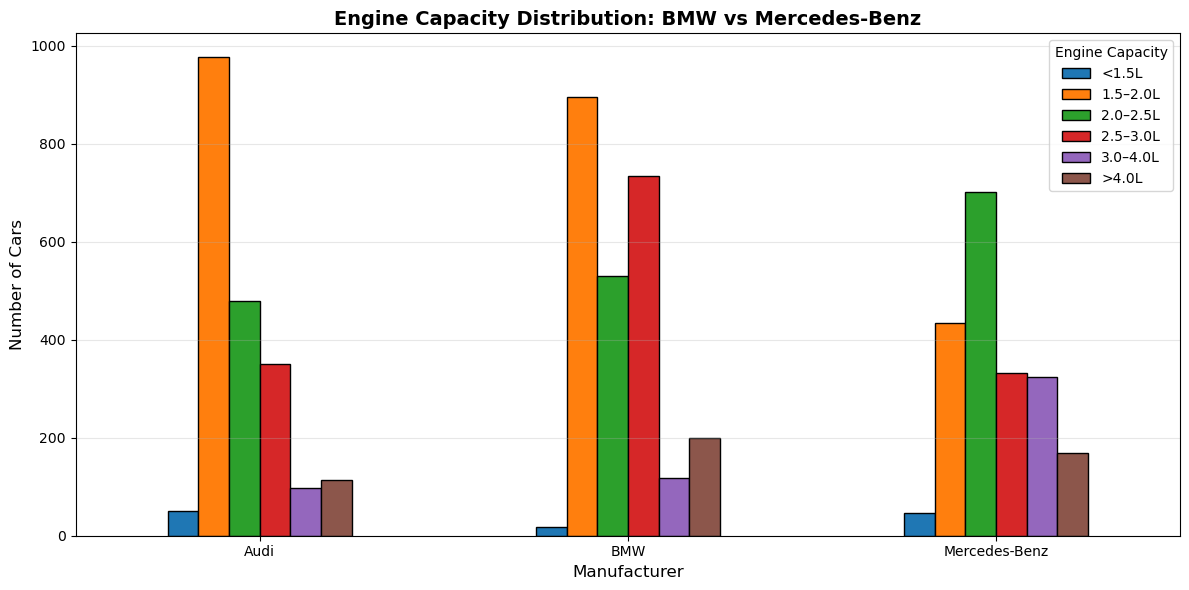

In [39]:
### Seeing mercedes' and bmw's engine capacity

bmw_mercedes = df_clean[
    df_clean['manufacturer_name'].isin(['BMW', 'Mercedes-Benz', 'Audi'])
]

engine_bins = [0, 1.5, 2.0, 2.5, 3.0, 4.0, 10]
engine_labels = ['<1.5L', '1.5–2.0L', '2.0–2.5L', '2.5–3.0L', '3.0–4.0L', '>4.0L']

bmw_mercedes['engine_capacity_bin'] = pd.cut(
    bmw_mercedes['engine_capacity'],
    bins=engine_bins,
    labels=engine_labels
)

engine_bin_counts = (
    bmw_mercedes
    .groupby(['manufacturer_name', 'engine_capacity_bin'])
    .size()
    .unstack(fill_value=0)
)

print("=== Number of Cars by Engine Capacity (BMW vs Mercedes) ===")
engine_bin_counts

engine_bin_counts.plot(
    kind='bar',
    figsize=(12, 6),
    edgecolor='black'
)

plt.title("Engine Capacity Distribution: BMW vs Mercedes-Benz", fontsize=14, fontweight='bold')
plt.xlabel("Manufacturer", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.legend(title="Engine Capacity")
plt.grid(True, axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Price vs Year

Price Statistics by Production Year
    year_bin     min      max          mean   median  count
0  1940–1970     NaN      NaN           NaN      NaN      0
1  1971–1980     NaN      NaN           NaN      NaN      0
2  1981–1990   110.0  10000.0   1473.663127   1150.0    371
3  1991–1995   100.0  18000.0   1720.056173   1399.0   3899
4  1996–2000   100.0  25000.0   2631.146467   2300.0   9016
5  2001–2005   250.0  35000.0   5244.448115   4794.6   7554
6  2006–2010   400.0  41000.0   8789.017605   7900.0   8334
7  2011–2015  1050.0  50000.0  13834.796912  12000.0   5362
8  2016–2020  4099.0  49900.0  16879.297780  14333.0   1401


C:\Users\hafiz\AppData\Local\Temp\ipykernel_22436\3076795032.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('year_bin')['price_usd']


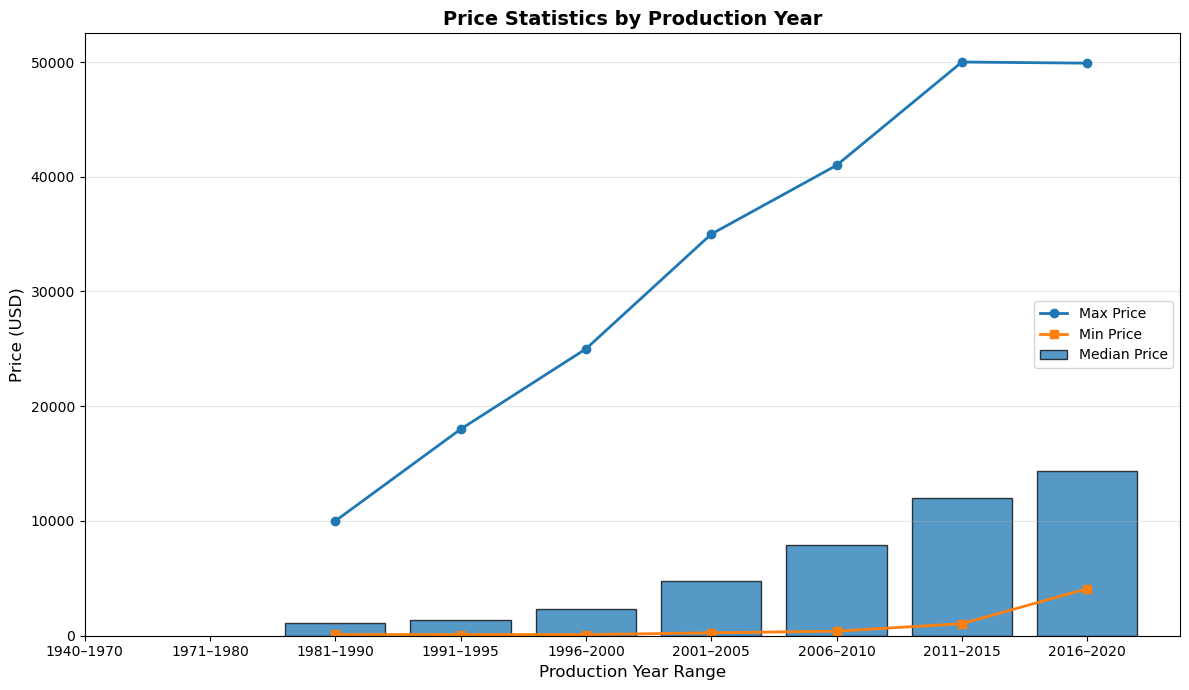

In [41]:
# Price vs Production Year (Binned)

df_clean['year_bin'] = pd.cut(
    df_clean['year_produced'],
    bins=[1940, 1970, 1980, 1990, 1995, 2000, 2005, 2010, 2015, 2020],
    labels=[
        '1940–1970', '1971–1980', '1981–1990', '1991–1995',
        '1996–2000', '2001–2005', '2006–2010', '2011–2015', '2016–2020'
    ]
)

year_stats = (
    df_clean
    .groupby('year_bin')['price_usd']
    .agg(['min', 'max', 'mean', 'median', 'count'])
    .reset_index()
)

print("Price Statistics by Production Year")
print(year_stats)

fig, ax = plt.subplots(figsize=(12, 7))
x_pos = range(len(year_stats))

# Median as main bar (better than mean)
ax.bar(
    x_pos,
    year_stats['median'],
    alpha=0.75,
    label="Median Price",
    edgecolor='black'
)

# Min & Max lines
ax.plot(x_pos, year_stats['max'], marker='o', label="Max Price", linewidth=2)
ax.plot(x_pos, year_stats['min'], marker='s', label="Min Price", linewidth=2)

ax.set_title("Price Statistics by Production Year", fontsize=14, fontweight='bold')
ax.set_xlabel("Production Year Range", fontsize=12)
ax.set_ylabel("Price (USD)", fontsize=12)

ax.set_xticks(x_pos)
ax.set_xticklabels(year_stats['year_bin'], rotation=0)

ax.legend()
ax.grid(True, axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


=== Number of Cars & Average Price by Production Year (1980–2000) ===
   year_produced  car_count    avg_price
0           1990        371  1473.663127
1           1991        561  1503.544403
2           1992        661  1686.712542
3           1993        734  1641.391948
4           1994        887  1868.135716


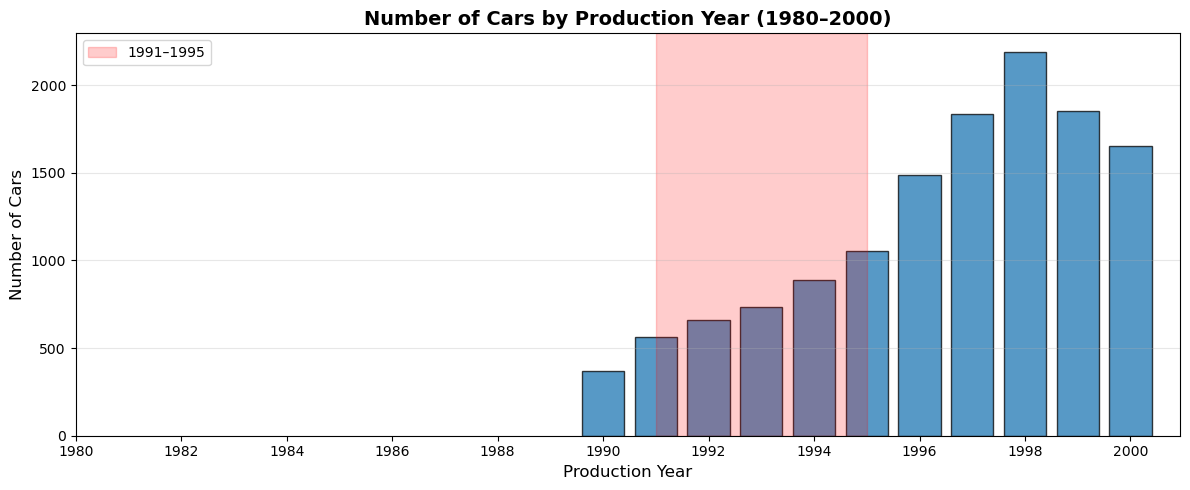

In [47]:
# Yearly car count and average price (1980–2000)

yearly_stats = (
    df_clean[df_clean['year_produced'].between(1980, 2000)]
    .groupby('year_produced')['price_usd']
    .agg(
        car_count='count',
        avg_price='mean'
    )
    .reset_index()
)

print("=== Number of Cars & Average Price by Production Year (1980–2000) ===")
print(yearly_stats.head())

plt.figure(figsize=(12, 5))

plt.bar(
    yearly_stats['year_produced'],
    yearly_stats['car_count'],
    edgecolor='black',
    alpha=0.75
)

# Highlight 1991–1995
plt.axvspan(1991, 1995, alpha=0.2, color='red', label='1991–1995')

plt.title("Number of Cars by Production Year (1980–2000)", fontsize=14, fontweight='bold')
plt.xlabel("Production Year", fontsize=12)
plt.ylabel("Number of Cars", fontsize=12)
plt.xticks(range(1980, 2001, 2), rotation=0)
plt.grid(True, axis='y', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


### Contextual Interpretation: Early 1990s Price Instability

The dataset originates from Belarus, a former Soviet state. The period between 1991 and 1995 corresponds to a major economic transition following the dissolution of the Soviet Union. During this time, market liberalisation, changes in import policies, and currency instability may have influenced vehicle availability and resale prices.

The observed fluctuations in car prices during this period are therefore interpreted as potentially influenced by historical and economic factors, rather than purely vehicle-related attributes. This interpretation is contextual and complementary to the quantitative analysis.


## Price range for all brands


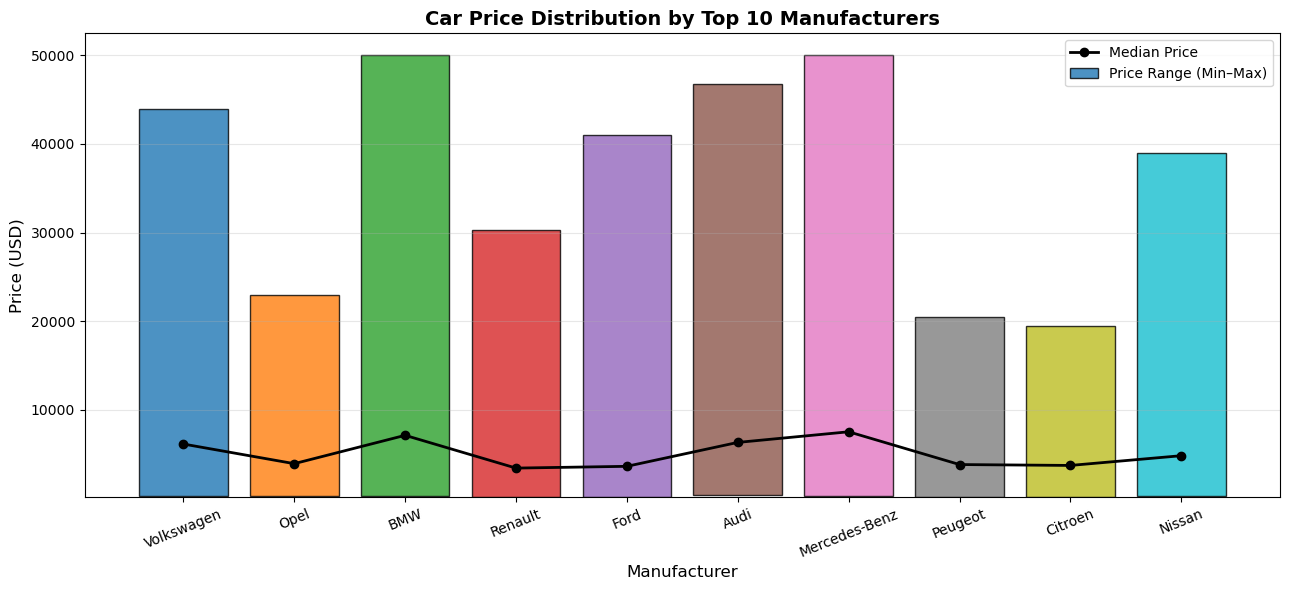

In [56]:
TOP_N_BRANDS = 10

top_manufacturers = df_clean['manufacturer_name'].value_counts().head(TOP_N_BRANDS)
top_brands = top_manufacturers.index.tolist()

brand_price_stats = (
    df_clean[df_clean['manufacturer_name'].isin(top_brands)]
    .groupby('manufacturer_name')['price_usd']
    .agg(
        min_price='min',
        median_price='median',
        max_price='max'
    )
    .loc[top_brands]
)

brands = brand_price_stats.index
x = py.arange(len(brands))

# Distinct colors per brand
colors = plt.cm.tab10.colors[:len(brands)]

plt.figure(figsize=(13, 6))

# Bar: Min–Max range
plt.bar(
    x,
    brand_price_stats['max_price'] - brand_price_stats['min_price'],
    bottom=brand_price_stats['min_price'],
    color=colors,
    edgecolor='black',
    alpha=0.8,
    label='Price Range (Min–Max)'
)

# Median price line
plt.plot(
    x,
    brand_price_stats['median_price'],
    marker='o',
    color='black',
    linewidth=2,
    label='Median Price'
)

plt.xticks(x, brands, rotation=22)
plt.xlabel("Manufacturer", fontsize=12)
plt.ylabel("Price (USD)", fontsize=12)
plt.title(
    "Car Price Distribution by Top 10 Manufacturers",
    fontsize=14,
    fontweight='bold'
)

plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


### Heatmap Correlation for Numerical Columns

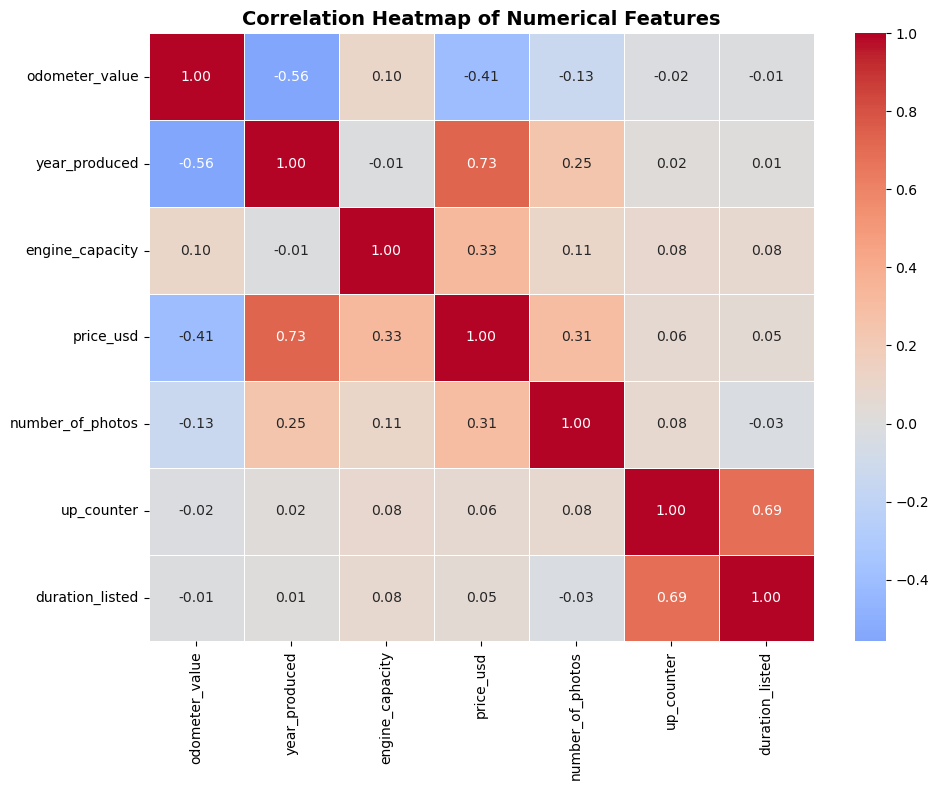

In [58]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[num_cols].corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### Correlation Analysis

=== QUICK CORRELATION ANALYSIS ===

Key Correlations with Price:
  • year_produced: 0.731 ↑
  • odometer_value: -0.410 ↓
  • engine_capacity: 0.329 ↑


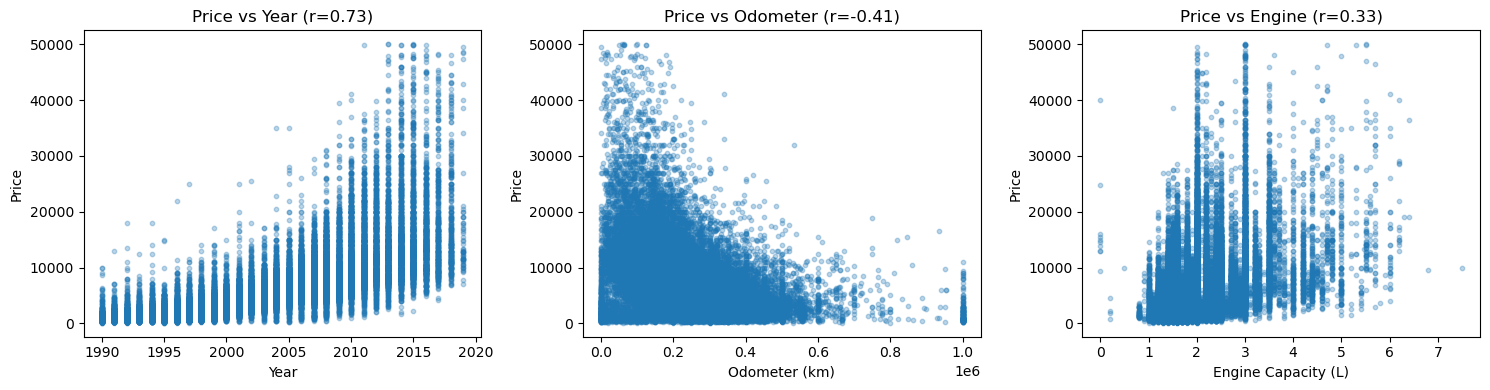

In [27]:
# Correlation Analysis
print("=== QUICK CORRELATION ANALYSIS ===")

# Numerical correlations
numerical_cols = ['price_usd', 'year_produced', 'odometer_value', 'engine_capacity']
corr_matrix = df_clean[numerical_cols].corr()

print("\nKey Correlations with Price:")
for col in ['year_produced', 'odometer_value', 'engine_capacity']:
    corr = corr_matrix.loc['price_usd', col]
    direction = "↑" if corr > 0 else "↓"
    print(f"  • {col}: {corr:.3f} {direction}")

# Quick visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Price vs Year
axes[0].scatter(df_clean['year_produced'], df_clean['price_usd'], alpha=0.3, s=10)
axes[0].set_title(f"Price vs Year (r={corr_matrix.loc['price_usd', 'year_produced']:.2f})")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Price")

# Price vs Odometer
axes[1].scatter(df_clean['odometer_value'], df_clean['price_usd'], alpha=0.3, s=10)
axes[1].set_title(f"Price vs Odometer (r={corr_matrix.loc['price_usd', 'odometer_value']:.2f})")
axes[1].set_xlabel("Odometer (km)")
axes[1].set_ylabel("Price")

# Price vs Engine
axes[2].scatter(df_clean['engine_capacity'], df_clean['price_usd'], alpha=0.3, s=10)
axes[2].set_title(f"Price vs Engine (r={corr_matrix.loc['price_usd', 'engine_capacity']:.2f})")
axes[2].set_xlabel("Engine Capacity (L)")
axes[2].set_ylabel("Price")

plt.tight_layout()
plt.show()

From the graph above, I could say that the newer the car, the higher the price. The lower the mileage, the higher the price. While the engine does not show much of a correlation.

## Feature Engineering

In [59]:
def create_recommendation_features(df):
    "Create features for recommendation system"
    df_enhanced = df.copy()

    print("== Creating Recommendation Features ==")

    current_year = df['year_produced'].max()
    df_enhanced['car_age'] = current_year - df_enhanced['year_produced']

    price_bins = [0, 10000, 20000, 35000, 80000, float('inf')]
    price_labels = ['Budget', 'Economy', 'Mid-Range', 'Premium', 'Luxury']
    df_enhanced['price_category'] = pd.cut(df_enhanced['price_usd'], bins=price_bins, labels=price_labels, right=False)

    df_enhanced['mileage_category'] = pd.cut(df_enhanced['odometer_value'], bins=[0, 50000, 150000, 300000, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'], right=False)

    feature_cols = [f'feature_{i}' for i in range(10)] + ['engine_has_gas', 'has_warranty', 'is_exchangeable']
    df_enhanced['total_features'] = df_enhanced[feature_cols].sum(axis=1)

    df_enhanced['luxury_score'] = (
        df_enhanced['total_features'] +
        (df_enhanced['engine_capacity'] > 2.5).astype(int) +
        df_enhanced['price_category'].map({'Budget': 0, 'Economy': 1, 'Mid-Range': 2, 'Premium': 3, 'Luxury': 4}).astype(int) +
        (df_enhanced['car_age'] < 10).astype(int)
    )

    print("New featurees created: car_age, price_category, mileagee_category, total_features, luxury_score")
    return df_enhanced

df_enhanced = create_recommendation_features(df_clean)

== Creating Recommendation Features ==
New featurees created: car_age, price_category, mileagee_category, total_features, luxury_score


In [60]:
def validate_cleaned_data(df):
    print("Validate cleanded dataset")
    print("== Data Validation ==")

    print(f"Final dataset shape: {df.shape}")
    print(f"Remaining missing values: {df.isnull().sum()}")

    print("== Detailed Mssing Values ==")
    missing_by_colum = df.isnull().sum()
    missing_by_colum = missing_by_colum[missing_by_colum > 0]

    if len(missing_by_colum) > 0:
        for col, missing_count in missing_by_colum.items():
            print(f"{col}: {missing_count} missing values ({missing_count/len(df)*100:.1f}%)")
    else:
        print("No Missing Values!")

    # Validate num ranges
    print(f"\nPrice range: ${df['price_usd'].min():0f} - ${df['price_usd'].max():.0f}")
    print(f"Odometer Range: {df['odometer_value'].min():0f} KM - {df['odometer_value'].max():.0f} KM")
    print(f"Year Range: {df['year_produced'].min()} - {df['year_produced'].max()}")
    print(f"Car age range: {df['car_age'].min()} - {df['car_age'].max()}")

    # Check new features/column
    print(f"\nPrice categories: {df['price_category'].value_counts().to_dict()}")
    print(f"Mileage categories: {df['mileage_category'].value_counts().to_dict()}")
    print(f"Luxury score range: {df['luxury_score'].min()} - {df['luxury_score'].max()}")

validate_cleaned_data(df_enhanced)

Validate cleanded dataset
== Data Validation ==
Final dataset shape: (35937, 38)
Remaining missing values: manufacturer_name       0
model_name              0
transmission            0
color                   0
odometer_value          0
year_produced           0
engine_fuel             0
engine_has_gas          0
engine_type             0
engine_capacity         0
body_type               0
has_warranty            0
state                   0
drivetrain              0
price_usd               0
is_exchangeable         0
location_region         0
number_of_photos        0
up_counter              0
feature_0               0
feature_1               0
feature_2               0
feature_3               0
feature_4               0
feature_5               0
feature_6               0
feature_7               0
feature_8               0
feature_9               0
duration_listed         0
is_electric             0
engine_capacity_bin    10
year_bin                0
car_age                 0
price_cat

### Cleaned data

In [30]:
df_enhanced.to_csv('../data/processed/cleaned_cars.csv', index=False)
print("Cleaned data saved to '../data/processed/cleaned_cars.csv'")

print("\n=== Final Dataset Preview ===")
print(df_enhanced[['manufacturer_name', 'model_name', 'price_usd', 'car_age', 'price_category', 'luxury_score']].tail(10))

Cleaned data saved to '../data/processed/cleaned_cars.csv'

=== Final Dataset Preview ===
      manufacturer_name     model_name  price_usd  car_age price_category  \
38521          Chrysler           Neon     550.00       30         Budget   
38522          Chrysler     PT Cruiser    4000.00       21         Budget   
38523          Chrysler  Grand Voyager    4220.81       26         Budget   
38524          Chrysler            300    3000.00       24         Budget   
38525          Chrysler        Voyager    3300.00       26         Budget   
38526          Chrysler            300    2750.00       25         Budget   
38527          Chrysler     PT Cruiser    4800.00       21         Budget   
38528          Chrysler            300    4300.00       25         Budget   
38529          Chrysler     PT Cruiser    4000.00       24         Budget   
38530          Chrysler        Voyager    3200.00       25         Budget   

       luxury_score  
38521             3  
38522             